<a href="https://colab.research.google.com/github/Feznix/Stats-554/blob/main/Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Heather Secrest

Date: 02/11/2026

Course: ST 554 (601)

# **Homework 4**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
st_data = pd.read_csv(" https://www4.stat.ncsu.edu/~online/datasets/StudentData.txt", sep = ';')
st_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


#### Numerical Summaries From Hw 3

##### Center and Spread for Three Variables

For this I choose mean and standard deviation as my center and spread values. I did the variables Age, G3, and G2. I subset them to be the females only for the `.loc` method. I created a new grouping using `.loc` to return the age, G3, or G2 values given they are female and then did the `.mean()` and `.std()` on those new groupings.

In [45]:
Age_Mean= round(st_data.age.mean(),1)
Age_st = round(st_data.age.std(),2)
print('The age mean is', Age_Mean, 'and standard deviation is',Age_st)


The age mean is 16.7 and standard deviation is 1.28


In [46]:
st_data['agef']=st_data.loc[st_data['sex']=='F',['age']]
AgeF_Mean= round(st_data.agef.mean(),1)
AgeF_st = round(st_data.agef.std(),2)
print('The age mean of the Females is', AgeF_Mean, 'and standard deviation is',AgeF_st)

The age mean of the Females is 16.7 and standard deviation is 1.2


In [48]:
G3_Mean= round(st_data.G3.mean(),1)
G3_st = round(st_data.G3.std(),2)
print('The G3 mean is', G3_Mean, 'and standard deviation is',G3_st)

The G3 mean is 10.4 and standard deviation is 4.58


In [49]:
st_data['G3f']=st_data.loc[st_data['sex']=='F',['G3']]
G3F_Mean= round(st_data.G3f.mean(),1)
G3F_st = round(st_data.G3f.std(),2)
print('The G3 mean of the Females is',G3F_Mean, 'and standard deviation is',G3F_st)

The G3 mean of the Females is 10.0 and standard deviation is 4.62


In [50]:
G2_Mean= round(st_data.G2.mean(),1)
G2_st = round(st_data.G2.std(),2)
print('The G2 mean is', G2_Mean, 'and standard deviation is',G2_st)

The G2 mean is 10.7 and standard deviation is 3.76


In [51]:
st_data['G2f']=st_data.loc[st_data['sex']=='F',['G2']]
G2F_Mean= round(st_data.G2f.mean(),1)
G2F_st = round(st_data.G2f.std(),2)
print('The G2 mean of the Females is',G2F_Mean, 'and standard deviation is',G2F_st)

The G2 mean of the Females is 10.4 and standard deviation is 3.64


##### Grouping Variables

I choose to first group by school for age, G3, and G2. I also rounded the final value to 2 for all values. I did this with mean and standard deviation. I then grouped by school and sex for the same variables for both mean and standard deviation.

In [ ]:
round(st_data.groupby(['school'])[['age','G3','G2']].mean(),2)

,age,G3,G2
school,,,
GP,16.52,10.49,10.78
MS,18.02,9.85,10.20


In [ ]:
round(st_data.groupby(['school'])[['age','G3','G2']].std(),2)

,age,G3,G2
school,,,
GP,1.22,4.63,3.81
MS,0.88,4.24,3.38


In [ ]:
round(st_data.groupby(['school','sex'])[['age','G3','G2']].mean(),2)

age     G3     G2
school sex                     
GP     F    16.58   9.97  10.40
       M    16.46  11.06  11.20
MS     F    17.84   9.92  10.32
       M    18.24   9.76  10.05

In [ ]:
round(st_data.groupby(['school','sex'])[['age','G3','G2']].std(),2)

age    G3    G2
school sex                  
GP     F    1.17  4.60  3.65
       M    1.26  4.59  3.95
MS     F    0.75  4.85  3.68
       M    1.00  3.49  3.06

##### Correlation Matrix

I used the `.corr` function and used `[]` to specify the list of variables that I wanted it to correlate beforehand as the ones we've defined as numeric.

In [ ]:
st_data[['age','absences','G1','G2','G3']].corr(numeric_only=True)

,age,absences,G1,G2,G3
age,1.000000,0.175230,-0.064081,-0.143474,-0.161579
absences,0.175230,1.000000,-0.031003,-0.031777,0.034247
G1,-0.064081,-0.031003,1.000000,0.852118,0.801468
G2,-0.143474,-0.031777,0.852118,1.000000,0.904868
G3,-0.161579,0.034247,0.801468,0.904868,1.000000


## Task 1

### Categorical Variables

In [52]:
st_data["schoolc"]=st_data.school.astype("category")
st_data.schoolc.cat.categories

Index(['GP', 'MS'], dtype='object')

In [53]:
st_data["sexc"]=st_data.sex.astype("category")
st_data.sexc= st_data.sexc.cat.rename_categories(["Female","Male"])
st_data.sexc.cat.categories

Index(['Female', 'Male'], dtype='object')

In [54]:
st_data["healthc"]= st_data.health.astype("category")
st_data.healthc= st_data.healthc.cat.rename_categories(["Very Bad","Bad","Fair","Good","Very Good"])
st_data.healthc.cat.categories

Index(['Very Bad', 'Bad', 'Fair', 'Good', 'Very Good'], dtype='object')

#### Stacked Bar Plot

I created a stacked bar plot of the health data I used last session divided by gender using the mathplot basically as done in the class notes.

In [55]:
pd.crosstab(index=st_data.healthc, columns= st_data.sexc,\
             margins=True,rownames=['Health'], colnames=["Sex"])

Sex,Female,Male,All
Health,,,
Very Bad,31,16,47
Bad,25,20,45
Fair,52,39,91
Good,37,29,66
Very Good,63,83,146
All,208,187,395


In [56]:
table= pd.crosstab(index=st_data.healthc, columns= st_data.sexc,\
             rownames=['Health'], colnames=["Sex"])
table

Sex,Female,Male
Health,,
Very Bad,31,16
Bad,25,20
Fair,52,39
Good,37,29
Very Good,63,83


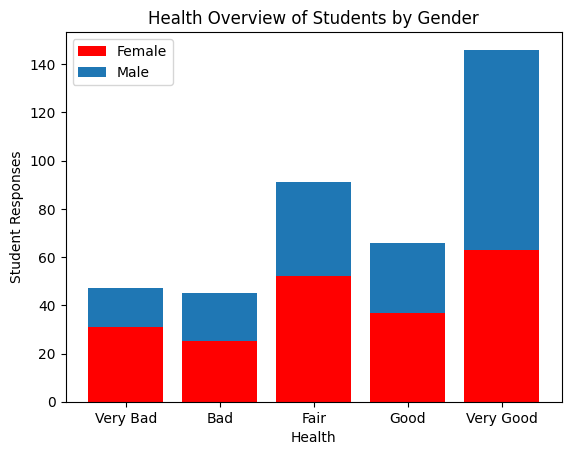

In [57]:
plt.bar(x=st_data.healthc.cat.categories, height=table.loc[:,"Female"],\
        label='Female', color='red')
plt.bar(x=st_data.healthc.cat.categories, height=table.loc[:,"Male"],\
        label='Male', bottom=table.loc[:,"Female"])
plt.xlabel("Health")
plt.ylabel("Student Responses")
plt.title("Health Overview of Students by Gender")
plt.legend(loc = 0)

I thought it was interesting in this data that females are more likely to report their health as very bad compared to males, but otherwise the trends of the health data for both genders is fairly similar. The highest group reported is very good health with Fair health being the second highest. Students were also more likely to report their health as very bad than bad whcih is a bit interesting.

#### Side by Side Bar Graph

In [58]:
st_data["guardianc"]=st_data.guardian.astype("category")
st_data.guardianc =st_data.guardianc.cat.rename_categories(['Father','Mother','Other'])
st_data.guardianc.cat.categories

Index(['Father', 'Mother', 'Other'], dtype='object')

In [59]:
table2= pd.crosstab(index=st_data.healthc, columns= st_data.guardianc,\
             rownames=['Health'], colnames=["Guardian"])
table2

Guardian,Father,Mother,Other
Health,,,
Very Bad,5,41,1
Bad,15,24,6
Fair,19,58,14
Good,14,49,3
Very Good,37,101,8


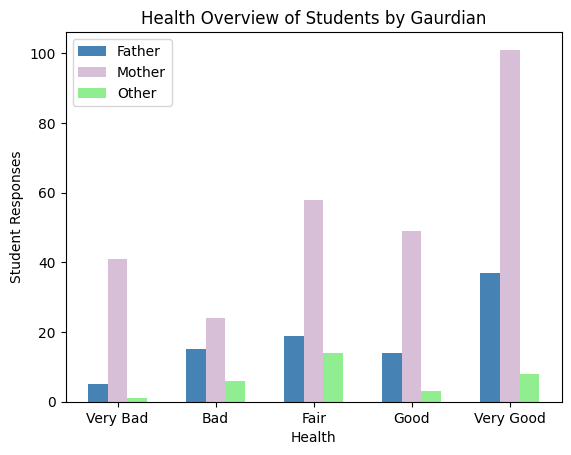

In [60]:
plt.bar(
    x=[0.8,1.8,2.8,3.8,4.8],
    height=table2.loc[:,"Father"],
    width=0.2,
    label='Father',
    color= 'steelblue')
plt.bar(x=[1,2,3,4,5],
    height=table2.loc[:,"Mother"],
    width=0.2,
    label='Mother',
    color= 'thistle')
plt.bar(x=[1.2,2.2,3.2,4.2,5.2],
    height=table2.loc[:,"Other"],
    width=0.2,
    label='Other',
    color= 'lightgreen')
plt.xticks([1,2,3,4,5],st_data.healthc.cat.categories)
plt.xlabel("Health")
plt.ylabel("Student Responses")
plt.title("Health Overview of Students by Gaurdian")
plt.legend(loc = 0)

For this data students raised by their Father or Mother had the highest health report for very good, but this was not true for students raised by an other guardian. Those students had their heighest health category as Fair. I also thought it was interesting that more students with their Mother as their primary guardian choose Very Bad health vs Bad health. This was the opposite for both students raised by their Father and students raised by an other guardian.

### Numerical Variables